In [0]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import make_scorer
from sklearn.metrics import silhouette_score
from collections import Counter 
from sklearn.cluster import KMeans

##1.Loading the dataset

In [0]:
insurancedf = pd.read_csv('https://raw.githubusercontent.com/vivekkchandra/CE888Assignment/master/Assignment2/Data/insurance80.csv', sep=',', quotechar='"')

## Information of insurancedf

In [0]:
insurancedf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   region    1338 non-null   int64  
 5   charges   1338 non-null   float64
 6   smoker    1338 non-null   int64  
dtypes: float64(2), int64(5)
memory usage: 73.3 KB


In [0]:
#target variable 
insurancedf['smoker'].value_counts() 

0    1064
1     274
Name: smoker, dtype: int64

## Data preprocessing

In [0]:
x=insurancedf.drop('smoker', axis=1)
y=insurancedf.smoker

Split data into train and test 

In [0]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7, random_state=90)

Performing standardisation by applying scale function

In [0]:
scalefn=StandardScaler().fit(x_train)
norm_xtrain=scalefn.transform(x_train)
norm_xtest=scalefn.transform(x_test)

Numpy to df conversion

In [0]:
x_train.loc[x_train.index,x_train.columns] = norm_xtrain
x_train.describe()

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,age,sex,bmi,children,region,charges
count,9.360000e+02,9.360000e+02,9.360000e+02,9.360000e+02,9.360000e+02,9.360000e+02
mean,3.631058e-17,2.656944e-16,1.268276e-16,-7.878906e-17,-2.398366e-16,-7.365903e-17
std,1.000535e+00,1.000535e+00,1.000535e+00,1.000535e+00,1.000535e+00,1.000535e+00
min,-1.538052e+00,-1.006431e+00,-2.406063e+00,-8.898824e-01,-1.352367e+00,-1.007730e+00
25%,-8.952384e-01,-1.006431e+00,-7.242604e-01,-8.898824e-01,-1.352367e+00,-7.020647e-01
50%,3.327002e-02,9.936102e-01,-5.621551e-02,-6.601501e-02,4.020551e-01,-3.238122e-01
75%,8.903547e-01,9.936102e-01,6.406388e-01,7.578524e-01,1.279266e+00,2.790935e-01
max,1.747439e+00,9.936102e-01,3.709887e+00,3.229454e+00,1.279266e+00,4.175047e+00


In [0]:
x_test.loc[x_test.index,x_test.columns] = norm_xtest
x_test.describe()

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,age,sex,bmi,children,region,charges
count,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000
mean,-0.077774,0.013491,0.164983,0.040555,0.007092,-0.012135
std,1.009525,1.001068,1.051277,0.976438,0.973145,1.006799
min,-1.538052,-1.006431,-2.263269,-0.889882,-1.352367,-1.008894
25%,-0.966662,-1.006431,-0.564765,-0.889882,-0.475156,-0.727636
50%,-0.181001,0.993610,0.132507,-0.066015,0.402055,-0.340270
75%,0.747507,0.993610,0.877168,0.757852,1.279266,0.233213
max,1.747439,0.993610,3.801744,3.229454,1.279266,3.744819


###Checking the imbalance

####Bar Graph for distribution

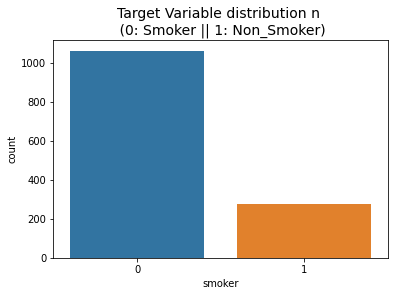

In [0]:
plt.title('Target Variable distribution n \n (0: Smoker || 1: Non_Smoker)', fontsize=14)
sns.countplot(y,data=insurancedf)


####Pie Chart Representing Percentage of Imbalance

In [0]:
Smoker=len(insurancedf[insurancedf['smoker']==0])
Non_Smoker= len(insurancedf[insurancedf['smoker']==1])

Smoker_percentage= Smoker/(Non_Smoker+Smoker)
Non_Smoker_percentage= Non_Smoker/(Non_Smoker+Smoker)

print("Smoker percentage is", Smoker_percentage*100)
print("Non_Smoker percentage is", Non_Smoker_percentage*100)

Smoker percentage is 79.52167414050822
Non_Smoker percentage is 20.47832585949178


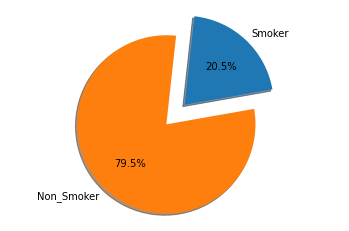

In [0]:
var_value = 'Smoker','Non_Smoker'
size=[Non_Smoker_percentage,Smoker_percentage]
design=(0.3,0)
fig, axi =plt.subplots()
axi.pie(size,explode=design,labels=var_value,autopct='%1.1f%%', shadow= True, startangle=10)
axi.axis('equal')
plt.show()

###Inspection of Dataset for some features

(array([ 22.,  83., 176., 223., 201., 133.,  60.,  25.,  11.,   2.]),
 array([-2.40606328, -1.79446822, -1.18287315, -0.57127809,  0.04031697,
         0.65191203,  1.2635071 ,  1.87510216,  2.48669722,  3.09829228,
         3.70988734]),
 <a list of 10 Patch objects>)

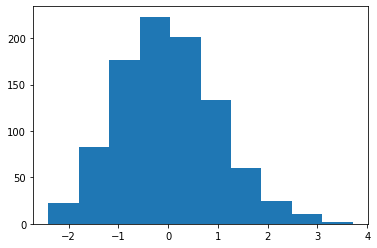

In [0]:
#train data
data = x_train.bmi
plt.hist(data)

(array([14., 43., 56., 89., 92., 59., 33., 10.,  4.,  2.]),
 array([-2.26326869, -1.65676747, -1.05026625, -0.44376503,  0.16273619,
         0.76923741,  1.37573863,  1.98223985,  2.58874107,  3.19524229,
         3.80174351]),
 <a list of 10 Patch objects>)

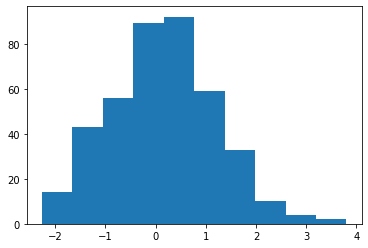

In [0]:
#test data 
data1 = x_test.bmi
plt.hist(data1)

(array([414., 218.,   0.,   0., 161., 115.,   0.,  14.,   0.,  14.]),
 array([-0.88988239, -0.4779487 , -0.06601501,  0.34591867,  0.75785236,
         1.16978605,  1.58171974,  1.99365342,  2.40558711,  2.8175208 ,
         3.22945449]),
 <a list of 10 Patch objects>)

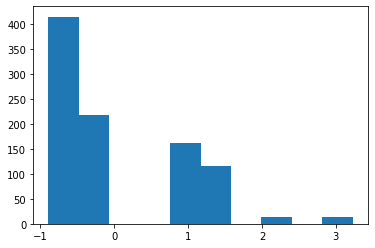

In [0]:
#train data
data = x_train.children
plt.hist(data)

(array([160., 106.,   0.,   0.,  79.,  42.,   0.,  11.,   0.,   4.]),
 array([-0.88988239, -0.4779487 , -0.06601501,  0.34591867,  0.75785236,
         1.16978605,  1.58171974,  1.99365342,  2.40558711,  2.8175208 ,
         3.22945449]),
 <a list of 10 Patch objects>)

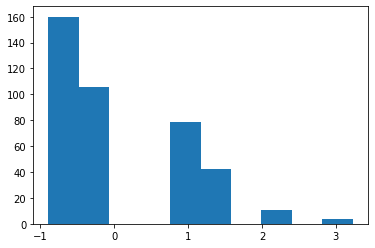

In [0]:
#test data 
data = x_test.children
plt.hist(data)

In [0]:
insurancedf.corr()

,age,sex,bmi,children,region,charges,smoker
age,1.000000,-0.020856,0.109272,0.042469,-0.005212,0.299008,-0.025019
sex,-0.020856,1.000000,0.046371,0.017163,0.016121,0.057292,0.076185
bmi,0.109272,0.046371,1.000000,0.012759,0.261829,0.198341,0.003750
children,0.042469,0.017163,0.012759,1.000000,-0.019257,0.067998,0.007673
region,-0.005212,0.016121,0.261829,-0.019257,1.000000,0.056993,0.053930
charges,0.299008,0.057292,0.198341,0.067998,0.056993,1.000000,0.787251
smoker,-0.025019,0.076185,0.003750,0.007673,0.053930,0.787251,1.000000


##2.To establish a baseline, perform cross-validation on your dataset using a decision tree and a random forest.

In [0]:
def boxplot(a,b,c,d):
  dfa=pd.DataFrame(a,columns=['Acc_scores'])
  dfa['Pre_scores']=b
  dfa['Rec_scores']=c
  dfa['F1_scores']=d
  plt.figure(6)
  boxplot = dfa.boxplot(column=['Acc_scores','Pre_scores','Rec_scores','F1_scores'])

In [0]:
#Function to establish a baseline and find average and accuracy 
def baseline(model,x,y):
  Acc_scores=cross_val_score(model,x,y,cv=10,scoring=make_scorer(accuracy_score)) #calculates accuracy 
  Pre_scores=cross_val_score(model,x,y,cv=10,scoring=make_scorer(precision_score)) #calculates precision
  Rec_scores=cross_val_score(model,x,y,cv=10,scoring=make_scorer(recall_score)) #calculates Recall
  F1_scores=cross_val_score(model,x,y,cv=10,scoring=make_scorer(f1_score)) #calculates F1
  print("Accuracy:", Acc_scores)
  print("Precision:", Pre_scores)
  print("Recall:", Rec_scores)
  print("F1 Score:", F1_scores)
  #Averages of the scores printed out
  print("Average Accuracy: %0.2f (+/- %0.2f)" % (Acc_scores.mean(), Acc_scores.std() * 2))
  print("Average Precision: %0.2f (+/- %0.2f)" % (Pre_scores.mean(), Pre_scores.std() * 2))
  print("Average Recall: %0.2f (+/- %0.2f)" % (Rec_scores.mean(), Rec_scores.std() * 2))
  print("Average F1 Score: %0.2f (+/- %0.2f)" % (F1_scores.mean(), F1_scores.std() * 2))
  boxplot(Acc_scores, Pre_scores,Rec_scores,F1_scores)
  


In [0]:
x=insurancedf.drop('smoker', axis=1) ##Predictors
y=insurancedf.smoker ## Target variable

Accuracy: [0.94776119 0.94029851 0.96268657 0.97761194 0.97761194 0.98507463
 0.99253731 0.96268657 0.94736842 0.96240602]
Precision: [0.92       0.88461538 0.84848485 1.         0.92857143 0.93103448
 1.         0.89285714 0.88461538 0.92307692]
Recall: [0.82142857 0.82142857 1.         0.89285714 0.96296296 1.
 0.96296296 0.92592593 0.85185185 0.88888889]
F1 Score: [0.86792453 0.85185185 0.91803279 0.94339623 0.94545455 0.96428571
 0.98113208 0.90909091 0.86792453 0.90566038]
Average Accuracy: 0.97 (+/- 0.03)
Average Precision: 0.92 (+/- 0.09)
Average Recall: 0.91 (+/- 0.13)
Average F1 Score: 0.92 (+/- 0.08)


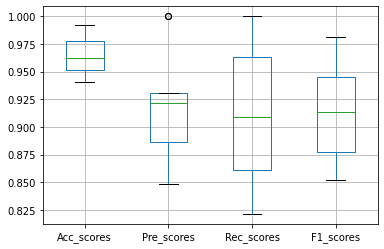

In [0]:
#Decision Tree to perform cross validation
decclf = DecisionTreeClassifier(random_state=0)
baseline(decclf,x,y)

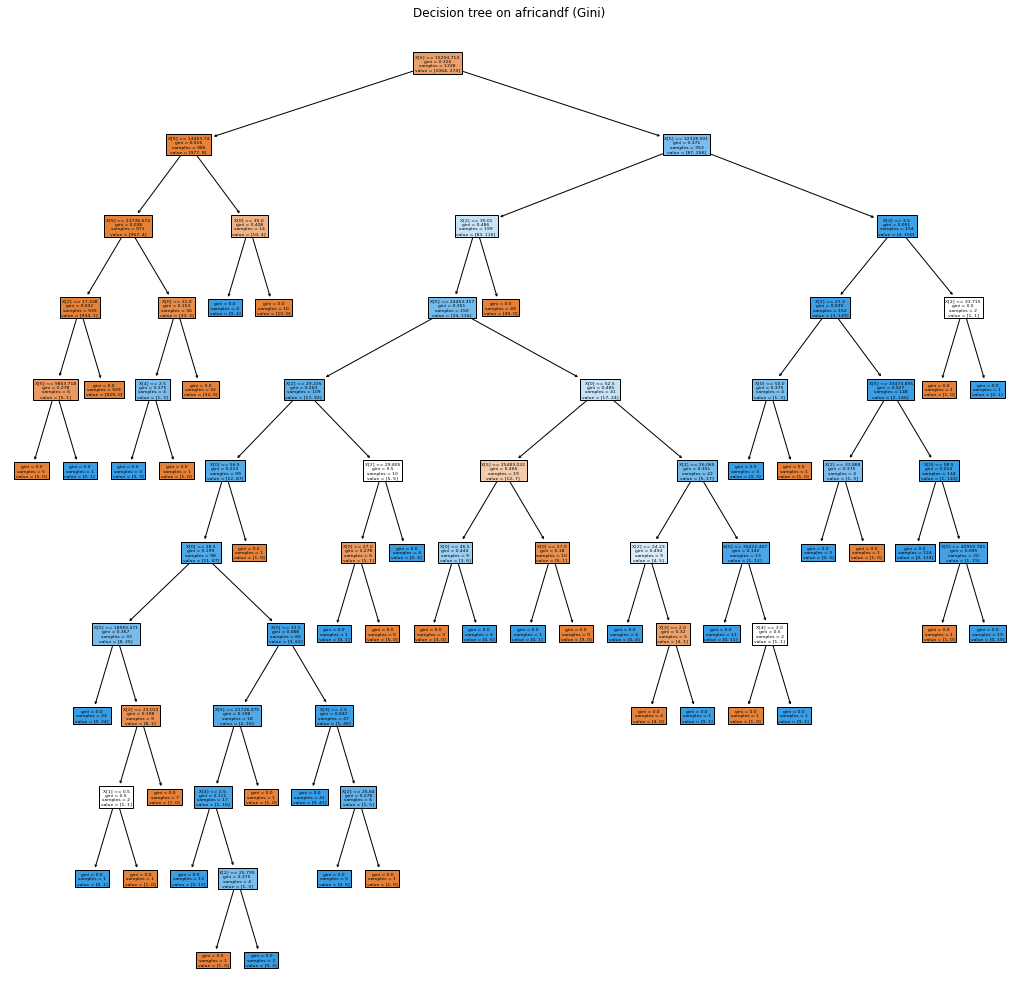

In [0]:
# Decision Tree
plt.figure(figsize=(18,18))
plottree=plot_tree(decclf.fit(x, y),filled=True)
plt.title("Decision tree on africandf (Gini)")
plt.show()


Accuracy: [0.94776119 0.95522388 0.94029851 0.94776119 0.96268657 0.97014925
 0.98507463 0.92537313 0.96992481 0.9924812 ]
Precision: [0.83870968 0.84375    0.81818182 0.92       0.89285714 0.92592593
 1.         0.78787879 0.89655172 0.96296296]
Recall: [0.92857143 0.96428571 0.96428571 0.85714286 0.92592593 0.92592593
 0.92592593 0.96296296 0.96296296 0.96296296]
F1 Score: [0.88135593 0.8852459  0.85245902 0.85185185 0.96296296 0.92592593
 0.98113208 0.86666667 0.92857143 0.96296296]
Average Accuracy: 0.96 (+/- 0.04)
Average Precision: 0.89 (+/- 0.13)
Average Recall: 0.94 (+/- 0.06)
Average F1 Score: 0.91 (+/- 0.09)


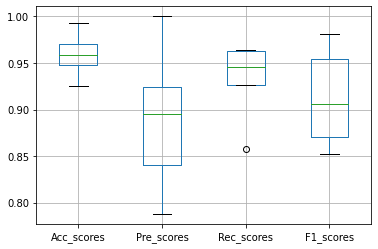

In [0]:
#Performing random forest classifier cross validation 
RFC=RandomForestClassifier()
baseline(RFC,x,y)

##3. Partition each of the datasets into 10 bins, keeping the imbalance ratio from the original dataset using stratified cross-validation 


## Stratified CV 

In [0]:
Folds = StratifiedKFold(n_splits=10,shuffle=False,random_state=None)
for train_index, test_index in Folds.split(x, y):
  xtrain, xtest = x.iloc[train_index], x.iloc[test_index]
  ytrain, ytest = y.iloc[train_index], y.iloc[test_index]
  train_0, train_1 = len(ytrain[ytrain==0]), len(ytrain[ytrain==1])
  test_0, test_1 = len(ytest[ytest==0]), len(ytest[ytest==1])
  print('>Train: 0=%d, 1=%d, Test: 0=%d, 1=%d' % (train_0, train_1, test_0, test_1))
  print(xtrain.shape)
  print(xtest.shape)
  

>Train: 0=958, 1=246, Test: 0=106, 1=28
(1204, 6)
(134, 6)
>Train: 0=958, 1=246, Test: 0=106, 1=28
(1204, 6)
(134, 6)
>Train: 0=958, 1=246, Test: 0=106, 1=28
(1204, 6)
(134, 6)
>Train: 0=958, 1=246, Test: 0=106, 1=28
(1204, 6)
(134, 6)
>Train: 0=957, 1=247, Test: 0=107, 1=27
(1204, 6)
(134, 6)
>Train: 0=957, 1=247, Test: 0=107, 1=27
(1204, 6)
(134, 6)
>Train: 0=957, 1=247, Test: 0=107, 1=27
(1204, 6)
(134, 6)
>Train: 0=957, 1=247, Test: 0=107, 1=27
(1204, 6)
(134, 6)
>Train: 0=958, 1=247, Test: 0=106, 1=27
(1205, 6)
(133, 6)
>Train: 0=958, 1=247, Test: 0=106, 1=27
(1205, 6)
(133, 6)


####Training Data

Smoker percentage is 79.50207468879668
Non_Smoker percentage is 20.497925311203318


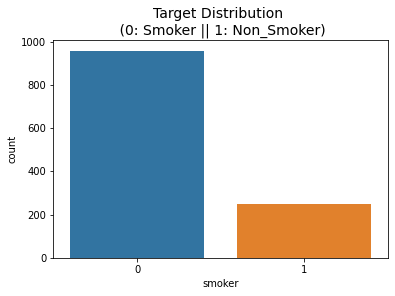

In [0]:
Smoker=len(ytrain[ytrain==0])
Non_Smoker= len(ytrain[ytrain==1])

Smoker_percentage= Smoker/(Non_Smoker+Smoker)
Non_Smoker_percentage= Non_Smoker/(Non_Smoker+Smoker)

print("Smoker percentage is", Smoker_percentage*100)
print("Non_Smoker percentage is", Non_Smoker_percentage*100)

plt.title('Target Distribution \n (0: Smoker || 1: Non_Smoker)', fontsize=14)
sns.countplot(ytrain,data=xtrain)


####Test Data

Smoker percentage is 79.69924812030075
Non_Smoker percentage is 20.30075187969925


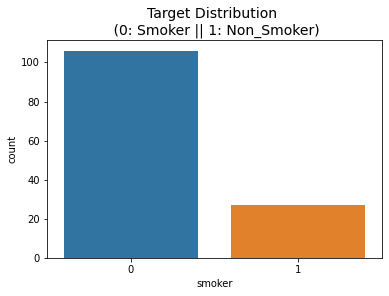

In [0]:
Smoker=len(ytest[ytest==0])
Non_Smoker= len(ytest[ytest==1])

Smoker_percentage= Smoker/(Non_Smoker+Smoker)
Non_Smoker_percentage= Non_Smoker/(Non_Smoker+Smoker)

print("Smoker percentage is", Smoker_percentage*100)
print("Non_Smoker percentage is", Non_Smoker_percentage*100)

plt.title('Target Distribution \n (0: Smoker || 1: Non_Smoker)', fontsize=14)
sns.countplot(ytest,data=xtest)

Skewed K folds is completed as both test and traing data share the same balance ratio.

##Elbow and Silhoutte method

In [0]:
#Elbow method function
def elbow():
  Sum_of_squared_distances = []
  K = range(1,30)
  for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(xtrain)
    Sum_of_squared_distances.append(km.inertia_)
  plt.figure(1)
  plt.plot(K, Sum_of_squared_distances, 'bx-')
  plt.xlabel('k')
  plt.ylabel('dist(Sun of squares)')
  plt.title('Optimal K: Elbow Method')
  plt.show()

In [0]:
#silhoutte
def silhoutte():
  silhoutte=[]
  k_silhoutte= range(2,10)
  for k_s in k_silhoutte:
    print(k_silhoutte,end=' ')
    kmeans= KMeans(n_clusters=k_s)
    kmeans=kmeans.fit(xtrain)
    labels=kmeans.labels_
    silhoutte.append(silhouette_score(xtrain,labels,metric='euclidean')) 
  plt.figure(2)
  plt.plot(k_silhoutte,silhoutte, 'bx-')
  plt.xlabel('k')
  plt.ylabel('silhouette_score')
  plt.title('Optimal K: Silhoutte Method')
  plt.show

##Summerise the distributions

Begin process
-------------------------------------------------------


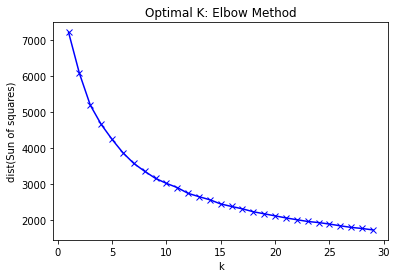

range(2, 10) range(2, 10) range(2, 10) range(2, 10) range(2, 10) range(2, 10) range(2, 10) range(2, 10) -------------------------------------------------------
-----------ytrain-------------
-------------------------------------------------------
Closest Clusters: 
 [2 3 1 ... 4 1 1]
centroids 
 [[ 0.16492909 -0.0929148  -0.15168022  1.61471868  0.05498607 -0.17753462]
 [-0.0597804  -1.01844246 -0.53779351 -0.41770741 -0.42535279 -0.25674846]
 [-0.06494131  0.98189151 -0.48953198 -0.38580292 -0.49868074 -0.32198673]
 [ 0.13032973  0.23510016  0.76628639  0.05081418  0.26280165  2.21076275]
 [-0.0604929   0.0573674   0.97439428 -0.35629438  0.9788708  -0.49827163]]
-------------------------------------------------------
cluster center shape 
 (5, 6)
-------------------------------------------------------
-------------------------------------------------------
clusters 
 [2 3 1 0 4]
-------------------------------------------------------
number of samples per cluster 
 Counter({1: 317, 2

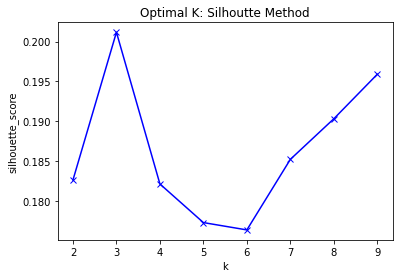

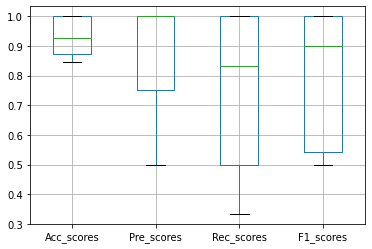

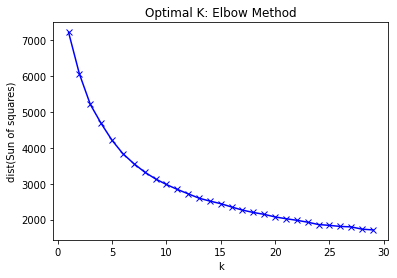

range(2, 10) range(2, 10) range(2, 10) range(2, 10) range(2, 10) range(2, 10) range(2, 10) range(2, 10) -------------------------------------------------------
-----------ytrain-------------
-------------------------------------------------------
Closest Clusters: 
 [1 2 3 ... 2 1 1]
centroids 
 [[ 6.23033072e-02  2.82564264e-01  7.78016046e-01  4.32641126e-02
   2.69287208e-01  2.23302558e+00]
 [-1.47509717e-01 -1.01001694e+00 -4.86201748e-01 -4.34190676e-01
  -2.77432510e-01 -3.12905149e-01]
 [ 2.71959461e-02  2.45859388e-01  1.05716592e+00 -3.55015008e-01
   9.73095525e-01 -4.52736749e-01]
 [ 2.65623344e-01 -1.36187134e-01 -1.02699536e-01  1.60922455e+00
  -9.15291976e-04 -1.29963310e-01]
 [-6.38567427e-02  9.90082400e-01 -5.25363607e-01 -3.83449655e-01
  -5.28005881e-01 -3.30739323e-01]]
-------------------------------------------------------
cluster center shape 
 (5, 6)
-------------------------------------------------------
-------------------------------------------------------

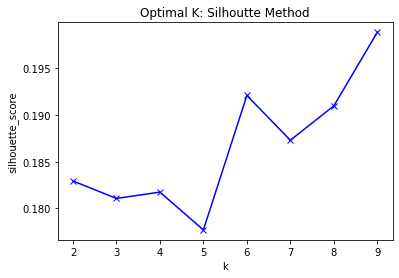

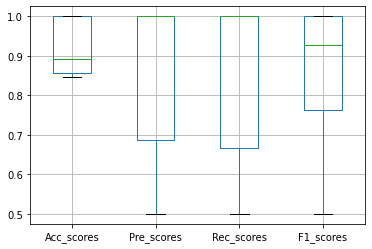

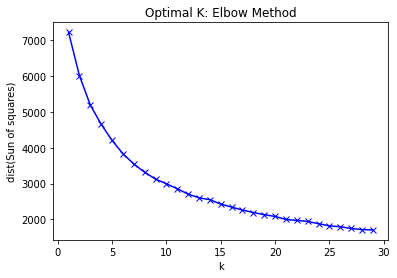

range(2, 10) range(2, 10) range(2, 10) range(2, 10) range(2, 10) range(2, 10) range(2, 10) range(2, 10) -------------------------------------------------------
-----------ytrain-------------
-------------------------------------------------------
Closest Clusters: 
 [3 4 2 ... 4 3 3]
centroids 
 [[-0.14204505  0.99502897 -0.58256759 -0.33610319 -0.53579852 -0.34141325]
 [ 0.0781345   0.22037146  0.77150935 -0.0156037   0.3367803   2.26581586]
 [ 0.2768408  -0.14921601 -0.05546179  1.60503293  0.02538653 -0.12207652]
 [-0.15637329 -1.00499587 -0.441194   -0.42061662 -0.29428005 -0.29558024]
 [ 0.125997    0.28804344  1.04606061 -0.40635349  0.95340515 -0.43807717]]
-------------------------------------------------------
cluster center shape 
 (5, 6)
-------------------------------------------------------
-------------------------------------------------------
clusters 
 [3 4 2 0 1]
-------------------------------------------------------
number of samples per cluster 
 Counter({3: 349, 0

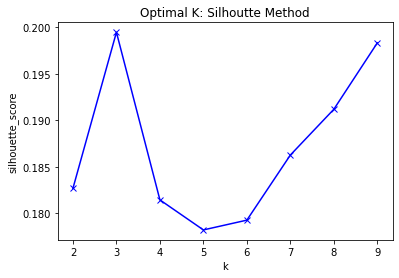

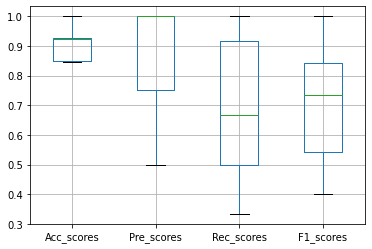

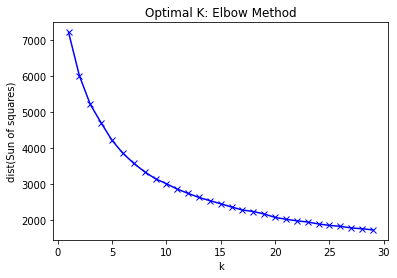

range(2, 10) range(2, 10) range(2, 10) range(2, 10) range(2, 10) range(2, 10) range(2, 10) range(2, 10) -------------------------------------------------------
-----------ytrain-------------
-------------------------------------------------------
Closest Clusters: 
 [0 3 1 ... 3 0 0]
centroids 
 [[-0.07858267 -1.         -0.55170695 -0.48802472 -0.39930444 -0.27424254]
 [ 0.18217369 -0.28780488 -0.02600891  1.58277473 -0.03494874 -0.16049399]
 [-0.03719447  1.         -0.54128481 -0.31983127 -0.43704216 -0.31269346]
 [-0.0703782   0.06034483  0.97827448 -0.37930216  0.98759913 -0.50467098]
 [ 0.09848656  0.27516779  0.77909905  0.08604291  0.24528904  2.22432924]]
-------------------------------------------------------
cluster center shape 
 (5, 6)
-------------------------------------------------------
-------------------------------------------------------
clusters 
 [0 3 1 2 4]
-------------------------------------------------------
number of samples per cluster 
 Counter({2: 311, 0

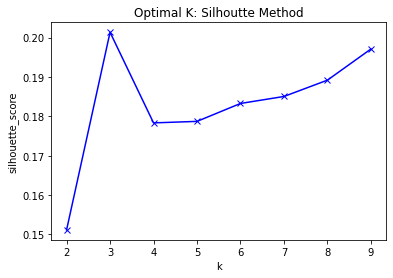

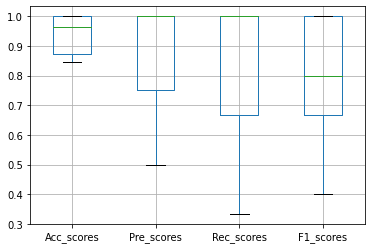

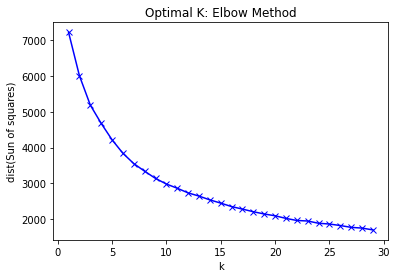

range(2, 10) range(2, 10) range(2, 10) range(2, 10) range(2, 10) range(2, 10) range(2, 10) range(2, 10) -------------------------------------------------------
-----------ytrain-------------
-------------------------------------------------------
Closest Clusters: 
 [4 1 1 ... 1 4 4]
centroids 
 [[ 0.08881591 -0.44277593 -0.19769189  1.47361456 -0.17166607 -0.15517058]
 [ 0.05122685  0.54475892  0.92906124 -0.29986014  0.95809105 -0.45029308]
 [ 0.11149747  0.33232909  0.77952057  0.00399496  0.33864854  2.27764421]
 [-0.09489186  0.97538589 -0.57119773 -0.30270946 -0.60084272 -0.29817895]
 [-0.0665726  -1.02523525 -0.33947113 -0.60976658 -0.16363793 -0.30302349]]
-------------------------------------------------------
cluster center shape 
 (5, 6)
-------------------------------------------------------
-------------------------------------------------------
clusters 
 [4 1 3 0 2]
-------------------------------------------------------
number of samples per cluster 
 Counter({4: 326, 3

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: [0.92857143 0.92857143 0.85714286 1.         1.         0.84615385
 0.84615385 0.92307692 1.         1.        ]
Precision: [0.75 1.   1.   1.   1.   0.5  0.   1.   1.   1.  ]
Recall: [1.         0.66666667 0.33333333 1.         1.         0.5
 0.         0.66666667 1.         1.        ]
F1 Score: [1.  0.8 0.5 1.  1.  0.5 0.  0.8 1.  1. ]
Average Accuracy: 0.93 (+/- 0.12)
Average Precision: 0.82 (+/- 0.63)
Average Recall: 0.72 (+/- 0.67)
Average F1 Score: 0.76 (+/- 0.63)
-------------------------------------------------------
Begin process
-------------------------------------------------------


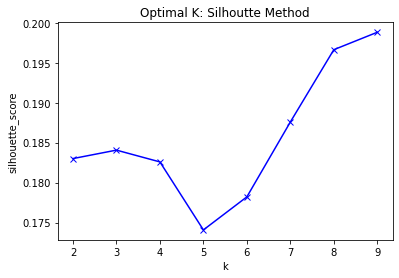

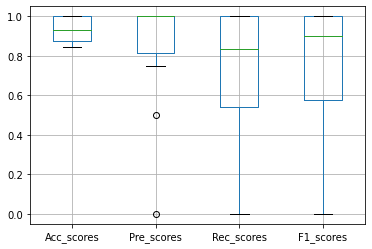

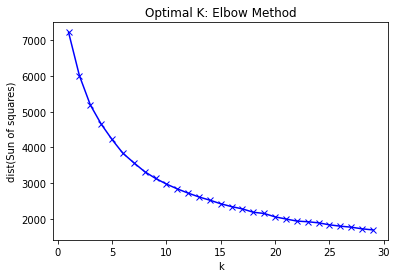

range(2, 10) range(2, 10) range(2, 10) range(2, 10) range(2, 10) range(2, 10) range(2, 10) range(2, 10) -------------------------------------------------------
-----------ytrain-------------
-------------------------------------------------------
Closest Clusters: 
 [1 0 2 ... 0 1 1]
centroids 
 [[ 0.09248778  0.23532793  1.06898175 -0.33857997  0.99033916 -0.43656364]
 [-0.16323442 -1.01001694 -0.49716951 -0.49401742 -0.29261253 -0.31723075]
 [ 0.22544175 -0.29500558 -0.03244348  1.5973673  -0.0759507  -0.15583296]
 [ 0.12480106  0.30548464  0.7634964   0.01188456  0.24810805  2.2173646 ]
 [-0.10090586  0.9900824  -0.55463493 -0.31787201 -0.44095673 -0.3297954 ]]
-------------------------------------------------------
cluster center shape 
 (5, 6)
-------------------------------------------------------
-------------------------------------------------------
clusters 
 [1 0 2 4 3]
-------------------------------------------------------
number of samples per cluster 
 Counter({1: 332, 4

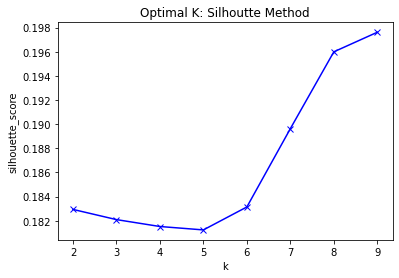

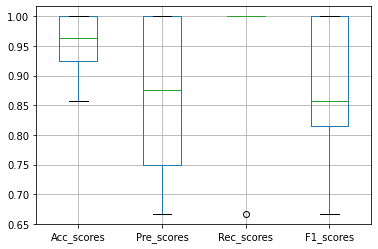

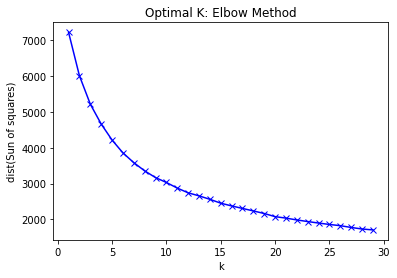

range(2, 10) range(2, 10) range(2, 10) range(2, 10) range(2, 10) range(2, 10) range(2, 10) range(2, 10) -------------------------------------------------------
-----------ytrain-------------
-------------------------------------------------------
Closest Clusters: 
 [1 0 3 ... 0 1 1]
centroids 
 [[ 0.05109495  0.21673876  1.06344014 -0.40038161  0.92117823 -0.46827029]
 [-0.12170504 -1.00499587 -0.50945036 -0.45025833 -0.307564   -0.29337545]
 [-0.13741007  0.99502897 -0.57305053 -0.31477819 -0.48040101 -0.33716847]
 [ 0.28642153 -0.22237745 -0.02619968  1.58944063 -0.00626997 -0.13065407]
 [ 0.07192383  0.3011428   0.7447768   0.02031928  0.28446596  2.2305962 ]]
-------------------------------------------------------
cluster center shape 
 (5, 6)
-------------------------------------------------------
-------------------------------------------------------
clusters 
 [1 0 3 2 4]
-------------------------------------------------------
number of samples per cluster 
 Counter({1: 336, 2

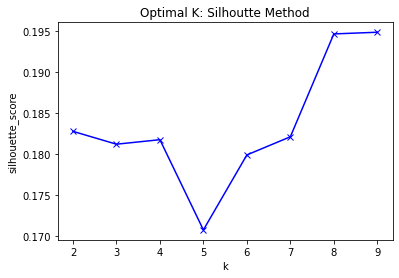

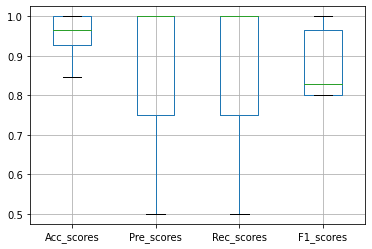

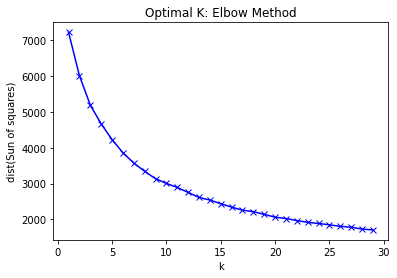

range(2, 10) range(2, 10) range(2, 10) range(2, 10) range(2, 10) range(2, 10) range(2, 10) range(2, 10) -------------------------------------------------------
-----------ytrain-------------
-------------------------------------------------------
Closest Clusters: 
 [1 0 2 ... 0 1 1]
centroids 
 [[-0.0354098   0.20017401  1.06813277 -0.38286828  0.93647154 -0.46586723]
 [-0.08378071 -1.00166251 -0.53519608 -0.45784771 -0.2805864  -0.27770846]
 [ 0.22744127 -0.20166141  0.01261147  1.56762633 -0.02308587 -0.16351069]
 [ 0.07779287  0.24309445  0.77331951  0.05134835  0.25665812  2.27774162]
 [-0.07754166  0.99834025 -0.55963396 -0.33497633 -0.475883   -0.32463587]]
-------------------------------------------------------
cluster center shape 
 (5, 6)
-------------------------------------------------------
-------------------------------------------------------
clusters 
 [1 0 2 4 3]
-------------------------------------------------------
number of samples per cluster 
 Counter({1: 335, 4

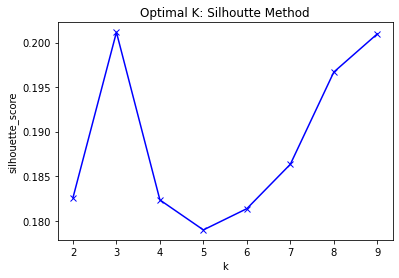

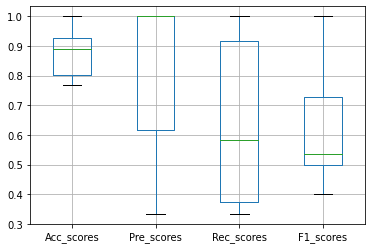

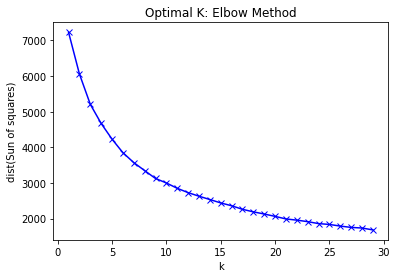

range(2, 10) range(2, 10) range(2, 10) range(2, 10) range(2, 10) range(2, 10) range(2, 10) range(2, 10) -------------------------------------------------------
-----------ytrain-------------
-------------------------------------------------------
Closest Clusters: 
 [2 4 1 ... 4 2 2]
centroids 
 [[ 0.13891794  0.28353126  0.74258898 -0.02051399  0.29212959  2.22458835]
 [ 0.21921392 -0.2017735   0.00352498  1.55789467  0.02763968 -0.15545754]
 [-0.14432036 -1.02777137 -0.49511457 -0.4516346  -0.26220996 -0.31132618]
 [-0.1418397   0.97297904 -0.57428038 -0.33891005 -0.55370413 -0.33251546]
 [ 0.09869131  0.25308286  1.03798553 -0.40919198  0.93743634 -0.44168051]]
-------------------------------------------------------
cluster center shape 
 (5, 6)
-------------------------------------------------------
-------------------------------------------------------
clusters 
 [2 4 1 3 0]
-------------------------------------------------------
number of samples per cluster 
 Counter({2: 330, 3

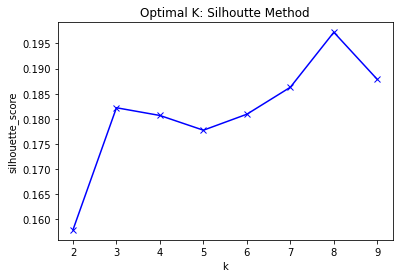

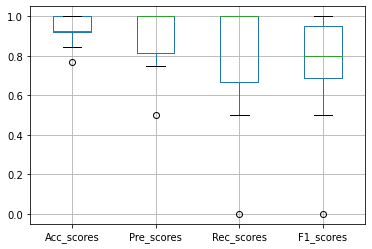

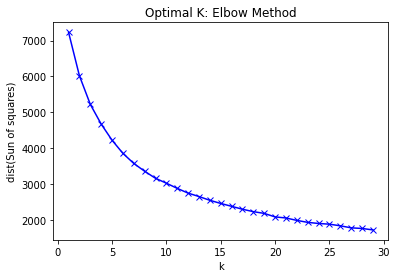

range(2, 10) range(2, 10) range(2, 10) range(2, 10) range(2, 10) range(2, 10) range(2, 10) range(2, 10) -------------------------------------------------------
-----------ytrain-------------
-------------------------------------------------------
Closest Clusters: 
 [1 4 0 ... 3 1 3]
centroids 
 [[ 0.20104946 -0.26210582 -0.00772135  1.58761175  0.03648525 -0.16063862]
 [-0.125125   -1.00249273 -0.47504753 -0.45868376 -0.27494934 -0.2913292 ]
 [-0.13770716  0.99751346 -0.56920824 -0.30183791 -0.52630284 -0.34330504]
 [ 0.06822374  0.27148382  0.76436475  0.01161152  0.26856978  2.23950709]
 [ 0.14917895  0.29328593  1.03737409 -0.40236929  0.95313708 -0.43334424]]
-------------------------------------------------------
cluster center shape 
 (5, 6)
-------------------------------------------------------
-------------------------------------------------------
clusters 
 [1 4 0 2 3]
-------------------------------------------------------
number of samples per cluster 
 Counter({1: 342, 2

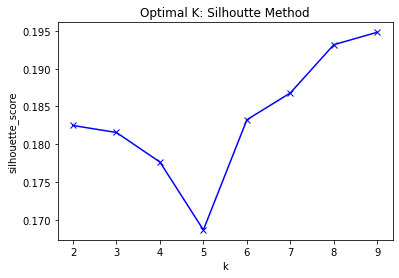

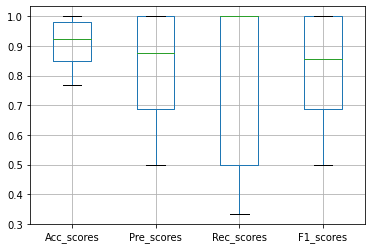

In [0]:
for train_index, test_index in Folds.split(x, y):
  
  #selects rows
  xtrain, xtest = x.iloc[train_index], x.iloc[test_index]
  ytrain, ytest = y.iloc[train_index], y.iloc[test_index]
    
  std_scaled=StandardScaler().fit(xtrain)
  xtrain=std_scaled.transform(xtrain)
  xtest=std_scaled.transform(xtest)

  print('Begin process')
  print('-----------'*5)
  #calling elbow and silhoutte method
  elbow()
  silhoutte()
  #run kmeans
  numk=5
  kmeans=KMeans(n_clusters=numk)
  kmeans = kmeans.fit(xtrain)

  cluster_ytrain = kmeans.predict(xtrain)
  print('-----------'*5)
  print('-----------ytrain-------------')
  print('-----------'*5)
  #Predict the closest cluster each sample
  print('Closest Clusters: \n', cluster_ytrain)
  centroids=kmeans.cluster_centers_
  print('centroids \n', centroids)
  print('-----------'*5)
  #5 clusters in 49 dimensions
  print('cluster center shape \n',kmeans.cluster_centers_.shape)
  print('-----------'*5)
  
  
  #append the cluster labels into df
  df0=pd.DataFrame(data=xtrain)
  df0['clusters']=cluster_ytrain
  
  #prints the clusters labels in ascending order for each iteration
  print('-----------'*5)
  print('clusters \n',df0.clusters.unique())
  print('-----------'*5)
  print('number of samples per cluster \n', Counter(cluster_ytrain))
  print('-----------'*5)
  cluster_ytest =  kmeans.predict(xtest)

  df1=pd.DataFrame(data=xtest)
  df1['clusters']=cluster_ytest
  print('---------ytest--------------')
  print('-----------'*5)
  print('Closest Clusters: \n', cluster_ytest)
  RFC=RandomForestClassifier()
  print('-----------'*5)
  baseline(RFC,df1,ytest)
  print('-----------'*5)
